## Analyse d'un jeu de données d'une grande distribution
## Objectif : identifier les produits, les régions, les catégories et les segments de clientèle à cibler ou à éviter

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "notebook_connected"
%matplotlib inline

In [34]:
df = pd.read_csv('superstore.csv', encoding='ISO-8859-1')

In [35]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [37]:
# Valeurs nulles
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [38]:
# Les valeurs dupliquées
df.duplicated().sum()

0

In [39]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [40]:
pd.set_option('display.max_columns',None)

In [41]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [42]:
pd.DataFrame(data=[df.nunique(),df.dtypes]).T.rename({0:'cardialité',1:'type'},axis=1)

,cardialité,type
Row ID,9994,int64
Order ID,5009,object
Order Date,1237,datetime64[ns]
Ship Date,1334,datetime64[ns]
Ship Mode,4,object
Customer ID,793,object
Customer Name,793,object
Segment,3,object
Country,1,object
City,531,object


In [43]:
# Vérifier s'il y a des erreurs de format
print(df['Ship Mode'].unique())
print(df['Segment'].unique())
print(df['Region'].unique())
print(df['Category'].unique())
print(df['Sub-Category'].unique())
print(df['Quantity'].unique())
print(df['Discount'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['South' 'West' 'Central' 'East']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
[ 2  3  5  7  4  6  9  1  8 14 11 13 10 12]
[0.   0.45 0.2  0.8  0.3  0.5  0.7  0.6  0.32 0.1  0.4  0.15]


In [44]:
### Le pays est le même pour tous
df.drop('Country', axis=1, inplace=True)

## Visualisation

In [45]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.weekday

In [46]:
reg = pd.DataFrame(df.groupby('Region')['Region'].count())
seg = pd.DataFrame(df.groupby('Segment')['Segment'].count())
ship = pd.DataFrame(df.groupby('Ship Mode')['Ship Mode'].count())
cat = pd.DataFrame(df.groupby('Category')['Category'].count())
vreg = pd.DataFrame(df.groupby('Region')['Profit'].sum())
vseg = pd.DataFrame(df.groupby('Segment')['Profit'].sum())
vship = pd.DataFrame(df.groupby('Ship Mode')['Profit'].sum())
vcat = pd.DataFrame(df.groupby('Category')['Profit'].sum())

In [47]:
fig = make_subplots(rows=4, cols=2, subplot_titles=['Distribution des ventes par région','Profit généré par région','Distribution des ventes par segment','Profit généré par segment',"Distribution des ventes par mode d'expédition","Profit généré par mode d'expédition",'Distribution des ventes par catégorie des produits','Profit généré par catégorie de produit'])
fig.add_trace(go.Bar(x=reg.index, y=reg['Region'], marker_color=['#636EFA', '#EF553B', '#00CC96']), row=1, col=1)
fig.add_trace(go.Bar(x=vreg.index,y=vreg['Profit'], marker_color=['#636EFA', '#EF553B', '#00CC96']), row=1, col=2)
fig.add_trace(go.Bar(x=seg.index,y=seg['Segment'], marker_color=['#636EFA', '#EF553B', '#00CC96']), row=2, col=1)
fig.add_trace(go.Bar(x=vseg.index,y=vseg['Profit'], marker_color=['#636EFA', '#EF553B', '#00CC96']), row=2, col=2)
fig.add_trace(go.Bar(x=ship.index,y=ship['Ship Mode'], marker_color=['#636EFA', '#EF553B', '#00CC96']), row=3, col=1)
fig.add_trace(go.Bar(x=vship.index,y=vship['Profit'], marker_color=['#636EFA', '#EF553B', '#00CC96']), row=3, col=2)
fig.add_trace(go.Bar(x=cat.index,y=cat['Category'], marker_color=['#636EFA', '#EF553B', '#00CC96']), row=4, col=1)
fig.add_trace(go.Bar(x=vcat.index, y=vcat['Profit'], marker_color=['#636EFA', '#EF553B', '#00CC96']), row=4, col=2)
fig.update_layout(
    width=1000,   
    height=1000, 
)
fig.show()
fig.write_html("graphique_interactif1.html")
from IPython.display import IFrame
IFrame("graphique_interactif1.html", width=800, height=600)

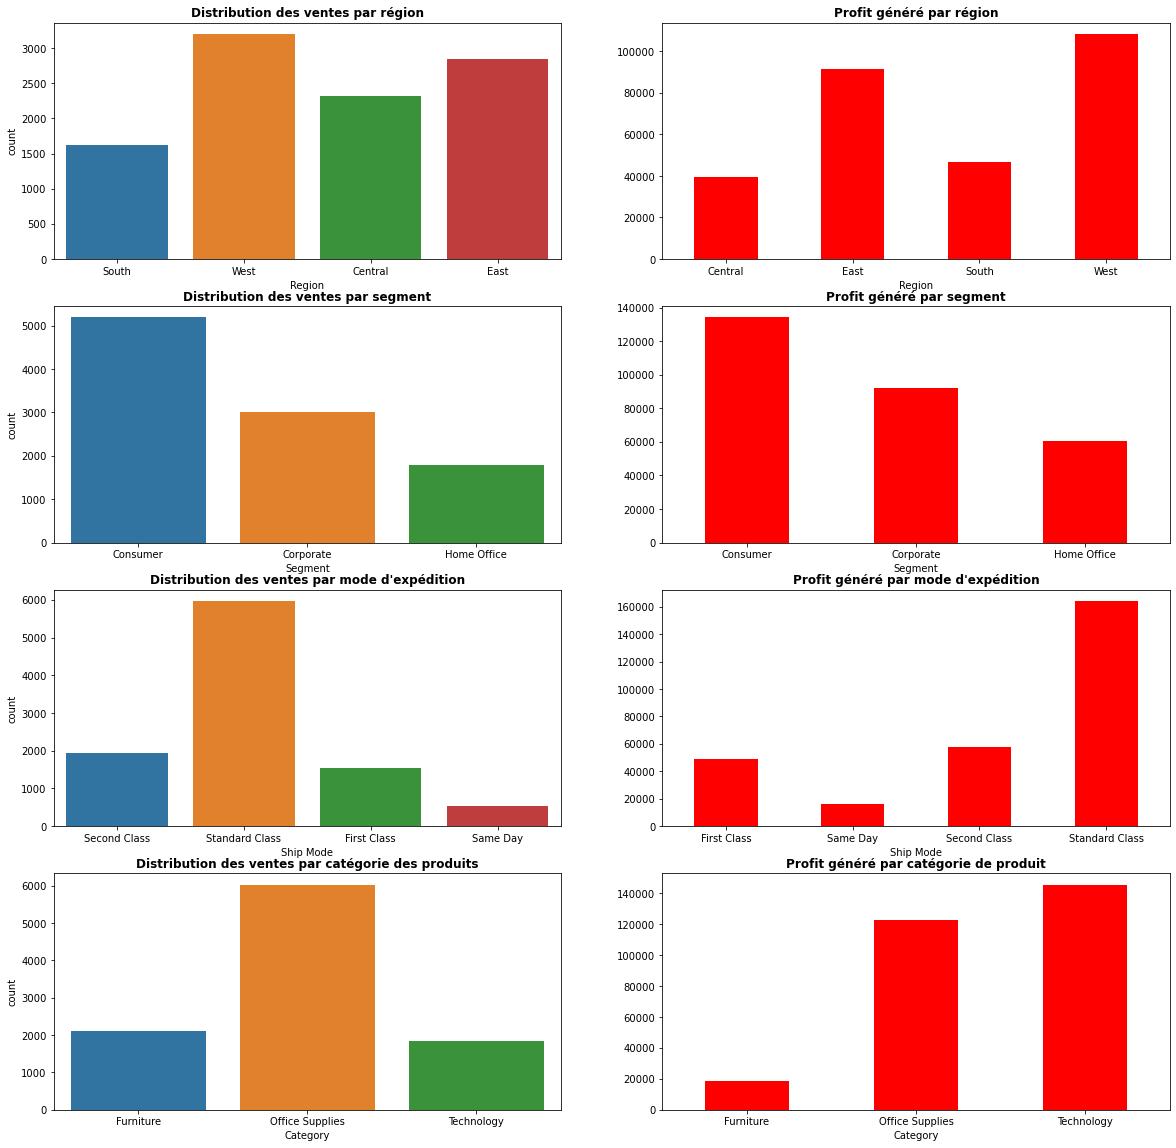

In [17]:
### 2ème méthode

plt.figure(figsize=(20,20))

plt.subplot(421)
sns.countplot(x='Region', data=df)
plt.title('Distribution des ventes par région',fontweight='bold')
plt.subplot(422)
df.groupby('Region')['Profit'].sum().plot.bar(color='r')
plt.title('Profit généré par région',fontweight='bold')
plt.xticks(rotation=0)

plt.subplot(423)
sns.countplot(x='Segment', data=df)
plt.title('Distribution des ventes par segment',fontweight='bold')
plt.subplot(424)
df.groupby('Segment')['Profit'].sum().plot.bar(color='r')
plt.title('Profit généré par segment',fontweight='bold')
plt.xticks(rotation=0)

plt.subplot(425)
sns.countplot(x='Ship Mode', data=df)
plt.title("Distribution des ventes par mode d'expédition",fontweight='bold')
plt.subplot(426)
df.groupby('Ship Mode')['Profit'].sum().plot.bar(color='r')
plt.title("Profit généré par mode d'expédition",fontweight='bold')
plt.xticks(rotation=0)

plt.subplot(427)
sns.countplot(x='Category', data=df)
plt.title('Distribution des ventes par catégorie des produits',fontweight='bold')
plt.subplot(428)
df.groupby('Category')['Profit'].sum().plot.bar(color='r')
plt.title('Profit généré par catégorie de produit',fontweight='bold')
plt.xticks(rotation=0);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


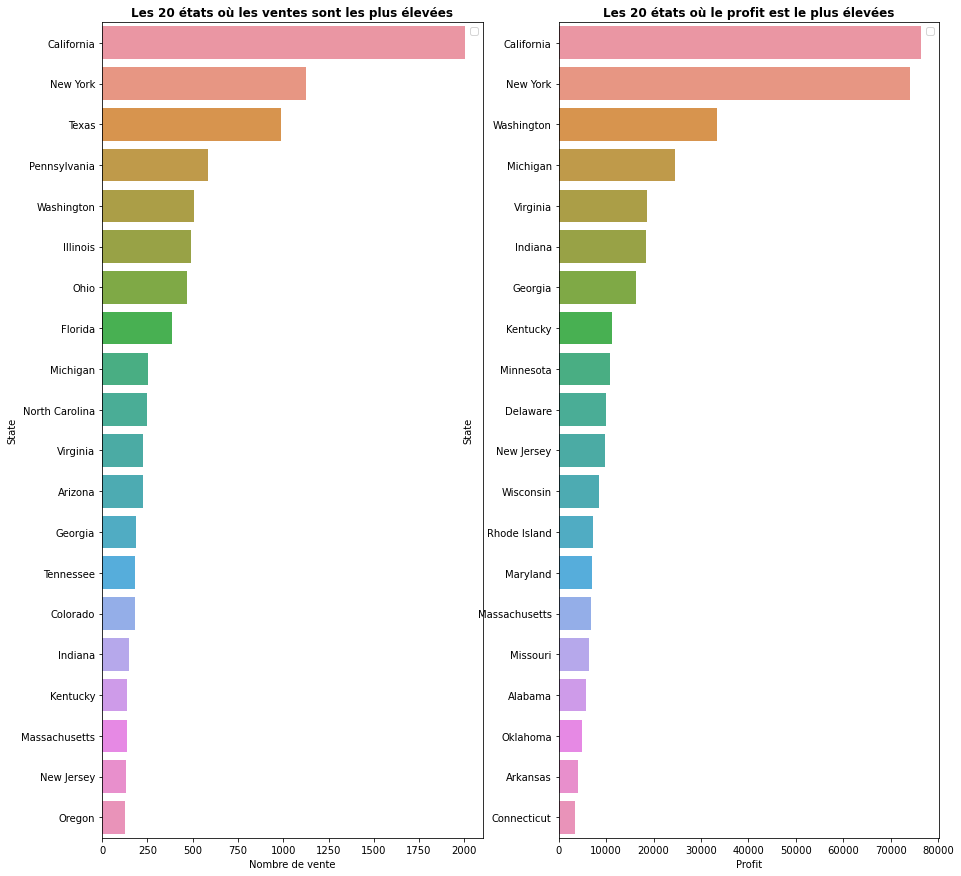

In [18]:
df_vente = df.groupby('State').agg({'State':'count'}).rename({'State':'NbVente'},axis=1).sort_values('NbVente', ascending=False).head(20)
df_profit = df.groupby('State').agg({'Profit':'sum'}).sort_values('Profit', ascending=False).head(20)

plt.figure(figsize=(15,15))
plt.subplot(121)
sns.barplot(x=df_vente.NbVente, y=df_vente.index)
plt.title('Les 20 états où les ventes sont les plus élevées', fontweight='bold')
plt.legend()
plt.xlabel('Nombre de vente')

plt.subplot(122)
sns.barplot(x=df_profit.Profit, y=df_profit.index)
plt.title('Les 20 états où le profit est le plus élevées', fontweight='bold')
plt.legend();

In [19]:
## Les produits qui génèrent le plus de profit
pd.DataFrame(df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(15))

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766
Ativa V4110MDD Micro-Cut Shredder,3772.9461
"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System,3696.2820
Ibico EPK-21 Electric Binding System,3345.2823


In [20]:
## Les 20 produits les plus vendus
df.groupby('Product Name').agg({'Product Name':'count'}).rename({'Product Name':'Nb'},axis=1).sort_values('Nb',ascending=False)\
.head(20)

,Nb
Product Name,
Staple envelope,48
Staples,46
Easy-staple paper,46
Avery Non-Stick Binders,20
Staples in misc. colors,19
Staple remover,18
KI Adjustable-Height Table,18
Storex Dura Pro Binders,17
Staple-based wall hangings,16


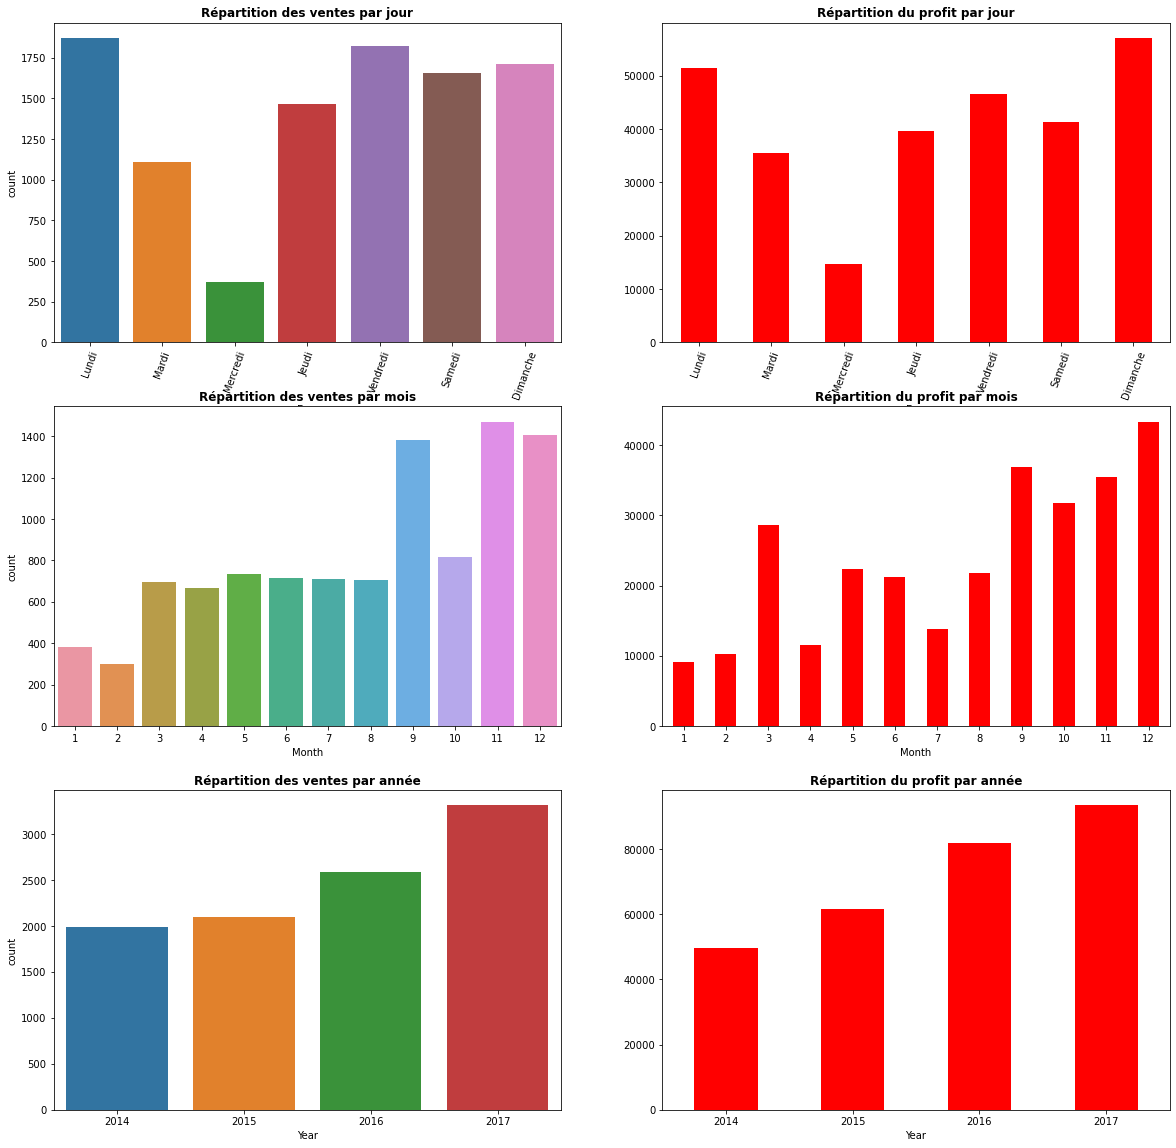

In [21]:
plt.figure(figsize=(20,20))

plt.subplot(321)
sns.countplot(x='Day', data=df)
plt.title('Répartition des ventes par jour', fontweight='bold')
plt.xticks(range(7), ['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche'],rotation=70)
plt.subplot(322)
df.groupby('Day')['Profit'].sum().plot.bar(color='r')
plt.xticks(range(7), ['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche'],rotation=70)
plt.title('Répartition du profit par jour', fontweight='bold')

plt.subplot(323)
sns.countplot(x='Month', data=df)
plt.title('Répartition des ventes par mois', fontweight='bold')
plt.subplot(324)
df.groupby('Month')['Profit'].sum().plot.bar(color='r')
plt.xticks(rotation=0)
plt.title('Répartition du profit par mois', fontweight='bold')

plt.subplot(325)
sns.countplot(x='Year', data=df)
plt.title('Répartition des ventes par année', fontweight='bold')
plt.subplot(326)
df.groupby('Year')['Profit'].sum().plot.bar(color='r')
plt.xticks(rotation=0)
plt.title('Répartition du profit par année', fontweight='bold');

In [22]:
### Une autre méthode
df['month/year'] = df['Order Date'].dt.to_period('M').astype(str)

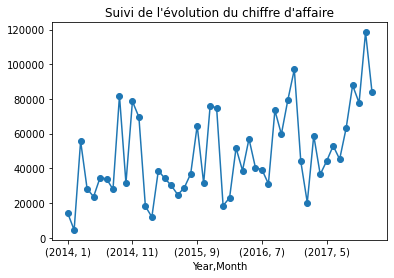

In [23]:
df.groupby(['Year','Month'])['Sales'].sum().plot(marker='o',title="Suivi de l'évolution du chiffre d'affaire");

In [26]:
ventemois=pd.DataFrame(df.groupby('month/year')['Sales'].sum()).reset_index()

fig = px.line(ventemois, x=ventemois['month/year'], y=ventemois['Sales'],template='plotly_dark')
fig.update_layout(title="Suivi de l'évolution du chiffre d'affaire",height=400,width=700, xaxis_title='Periode')
fig.show()
fig.write_html("graphique_interactif2.html")

In [27]:
profitmois = pd.DataFrame(df.groupby('month/year')['Profit'].sum()).reset_index()

fig = px.line(profitmois, x=profitmois['month/year'], y=profitmois['Profit'],template='plotly_dark')
fig.update_layout(title='Evolution du profit au cours du temps',xaxis_title='Periode',height=400,width=700)
fig.show()
fig.write_html("graphique_interactif3.html")

In [28]:
dfdisc = pd.DataFrame(df.groupby('Discount')['Profit'].sum().round(2))

fig = px.bar(x=dfdisc.index, y=dfdisc.Profit,color_discrete_sequence=['#b1e7cd'],template='plotly_dark', text_auto=True)
fig.update_layout(title='Profit généré selon la réduction appliquée', yaxis_title='Profit', xaxis_title='Discount',bargap=0)
fig.show()
fig.write_html("graphique_interactif4.html")

## Pour voir le graphique interactif

[Appuyer pour voir le graphique interactif](file:///C:/Users/myco/Documents/Jeux-de-donn%C3%A9es/graphique_interactif4.html)

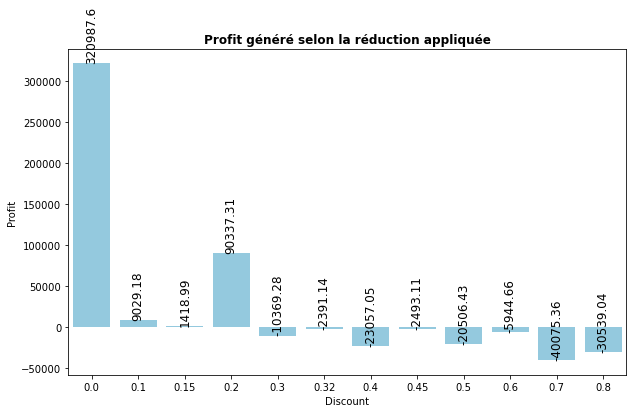

In [117]:
### Deuxième méthode
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=dfdisc.index, y=dfdisc.Profit, ax=ax, color='skyblue')

for i, v in enumerate(dfdisc['Profit']):
    ax.text(i, v + 100, str(v), ha='center', va='bottom', fontsize=12, color='black', rotation=90)
plt.title('Profit généré selon la réduction appliquée',fontweight='bold');

In [30]:
dfdisc = pd.DataFrame(df.groupby('Discount')['Profit'].sum().round(2)).reset_index()

fig = px.scatter(dfdisc, x=dfdisc['Discount'], y=dfdisc['Profit'], template='plotly_dark')
fig.update_layout(title='Total profit par remise accordé')
iplot(fig)
fig.write_html("graphique_interactif5.html")

## Pour voir le graphique interactif

[Appuyer pour voir le graphique interactif](file:///C:/Users/myco/Documents/Jeux-de-donn%C3%A9es/graphique_interactif5.html)

In [31]:
ProfitCat = pd.DataFrame(df.groupby('Category')['Profit'].sum()).reset_index()

fig = px.pie(ProfitCat, names=ProfitCat['Category'], values=ProfitCat['Profit'],\
             color_discrete_sequence=px.colors.sequential.RdBu,hole=0.4)
fig.update_layout(title='Profit généré selon la catégorie')
fig.show()
fig.write_html("graphique_interactif6.html")

## Pour voir le graphique interactif

[Voir le graphique interactif](file:///C:/Users/myco/Documents/Jeux-de-donn%C3%A9es/graphique_interactif6.html)